In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tncontract as tn
import time

import sys
sys.path.append("../src/")

from simulation_utils import *
from plotting_utils import *

from copy import deepcopy
from IPython.display import clear_output

In [5]:
n_sites = 4
cct_depth = 3000

psi = tn.onedim.init_mps_allzero(n_sites, 2)
chi = None

slice_depth = 100

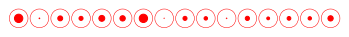

In [6]:
for j in range(int(cct_depth/3)):
    # Two-qubit layer
    cct_layer_1, cct_layer_2 = random_two_qubit_gate_ladder(n_sites)
    psi = tn.onedim.contract_mps_mpo(psi, cct_layer_1)
    psi.left_canonise(chi=chi)
    psi = tn.onedim.contract_mps_mpo(psi, cct_layer_2)
    psi.left_canonise(chi=chi)

    # Single qubit layer
    cct_layer = random_single_qubit_gate_layer(n_sites)
    psi = tn.onedim.contract_mps_mpo(psi,cct_layer)
    psi.left_canonise(chi=chi)

    # Plot speckle pattern.
    if np.mod(3*j, slice_depth) == 0:
        phi = deepcopy(psi)
        phi.left_canonise(normalise=True)

        phi_vec = tn.onedim.contract_virtual_indices(phi)
        phi_vec.fuse_indices('physout','physout')

        prob_vec = abs(phi_vec.data.reshape(-1, 1))**2

        clear_output(wait=True)
        speckle_pattern(prob_vec)
        plt.show()